# Investment Case Study
    Nikhil N Barigidad
<hr style="border:0.2px solid gray"> </hr>
Spark Funds wants to make investment in few companies, It wants to invest between 5 to 15 million USD in a round of
investment in English speaking countries. The goal of the assignment is to find the best suited sector, country and
funding type for Spark Funds to invest in.

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Check encoding of companies.csv file
import chardet
with open('companies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


In [3]:
#check encoding of rounds2.csv file
import chardet
with open('rounds2.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [4]:
#check encoding of rounds2.csv file
import chardet
with open('mapping.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [5]:
file_encoding = 'Windows-1254'        # set file_encoding to the file encoding (utf8, latin1, etc.)
rounds2_fd = open('rounds2.csv', encoding=file_encoding, errors = 'backslashreplace')
rounds2 = pd.read_csv(rounds2_fd, engine='python')

In [6]:
file_encoding = 'Windows-1254'        # set file_encoding to the file encoding (utf8, latin1, etc.)
companies_fd = open('companies.csv', encoding=file_encoding, errors = 'backslashreplace')
companies = pd.read_csv(companies_fd, engine='python')

In [7]:
file_encoding = 'ascii'        # set file_encoding to the file encoding (utf8, latin1, etc.)
mapping_fd = open('mapping.csv', encoding=file_encoding, errors = 'backslashreplace')
mapping = pd.read_csv(mapping_fd, engine='python')

In [8]:
#peak into companies df
companies.shape

(66368, 10)

In [9]:
#peak into rounds2 df
rounds2.shape

(114949, 6)

In [10]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [11]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [12]:
#Make company_permalink values in rounds2 df uniform
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [13]:
#Make permalink values in companies df uniform
companies['permalink'] = companies['permalink'].str.lower()

How many unique companies are present in rounds2?

In [14]:
#Uniques companies present in rounds2
rounds2.company_permalink.nunique()

66368

How many unique companies are present in companies?

In [15]:
#Unique companies present in companies df
companies.permalink.nunique()

66368

In [16]:
#Finding na values in companies
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [17]:
#Finding na values in rounds2
rounds2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [18]:
#Around 17.4% of rows in rounds2 dataset has funding_amount_usd as na
#dropping na values from funding_amount_usd
rounds2.dropna(subset=['raised_amount_usd'], inplace=True)

In [19]:
#finding out if there are companies that are present in rounds2 but not companies
r1 = set(companies['permalink'])
r2 = set(rounds2['company_permalink'])

In [20]:
#finding difference between companies company permalink and rounds2 permalink
r1.symmetric_difference(r2)

{'/organization/bimici',
 '/organization/natue',
 '/organization/statustoday',
 '/organization/glassmap',
 '/organization/optomed',
 '/organization/kettle-real-estate-investments',
 '/organization/metal-resources',
 '/organization/ice-gateway-gmbh',
 '/organization/pili-pop',
 '/organization/qwbcg',
 '/organization/jordan-training-technology-group',
 '/organization/hellocare',
 '/organization/smart-ventures',
 '/organization/epicsell',
 '/organization/7-cups-of-tea',
 '/organization/wealth-at-work',
 '/organization/store-locator-com',
 '/organization/ypd-online',
 '/organization/sunny-seg-segway-tours---rentals',
 '/organization/l4-mobile',
 '/organization/sparkitthere',
 '/organization/angelvest',
 '/organization/oshiboree',
 '/organization/freight-connection',
 '/organization/l-international',
 '/organization/all-d-graphics',
 '/organization/wellpath-solutions',
 '/organization/toilet-paper-and',
 '/organization/encarnate',
 '/organization/ethicalsuperstore-com',
 '/organization/date

In [21]:
#Merging rounds2 and companies dataframe to form master_frame
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')

In [22]:
master_frame.shape

(94959, 16)

In [23]:
#check na values
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

In [24]:
#df for venture funding type 
venture_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [25]:
venture_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22185
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                2608
category_list                502
status                         0
country_code                2117
state_code                  2861
region                      2713
city                        2713
founded_at                  9631
dtype: int64

In [26]:
venture_frame.shape

(50228, 16)

In [27]:
#dro na values from venture 
venture_frame = venture_frame.dropna(subset=['raised_amount_usd'])

In [28]:
venture_frame['raised_amount_usd'].describe()

count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [29]:
#total counts investemnets within 5 to 15 million amount range
venture_frame[(venture_frame['raised_amount_usd'] > 5000000) & (venture_frame['raised_amount_usd'] < 15000000)].shape

(13799, 16)

In [30]:
#df for seed funding type
seed_frame = master_frame[master_frame['funding_round_type'] == 'seed']

In [31]:
#total counts investemnets within 5 to 15 million amount range
seed_frame[(seed_frame['raised_amount_usd'] > 5000000) & (seed_frame['raised_amount_usd'] < 15000000)].shape

(145, 16)

In [32]:
#df for angel funding type
angel_frame = master_frame[master_frame['funding_round_type'] == 'angel']

In [33]:
#total counts investemnets within 5 to 15 million amount range
angel_frame[(angel_frame['raised_amount_usd'] > 5000000) & (angel_frame['raised_amount_usd'] < 15000000)].shape

(53, 16)

In [34]:
#df for private equity funding type
private_equity_frame = master_frame[master_frame['funding_round_type'] == 'private_equity']

In [35]:
#total counts investemnets within 5 to 15 million amount range
private_equity_frame[(private_equity_frame['raised_amount_usd'] > 5000000) & (private_equity_frame['raised_amount_usd'] < 15000000)].shape

(361, 16)

In [36]:
fundingtypesSpark = pd.DataFrame({'venture':[13799], 'seed':[145], 'angel':[53], 'private_equity':[361]})
fundingtypesSpark

,venture,seed,angel,private_equity
0,13799,145,53,361


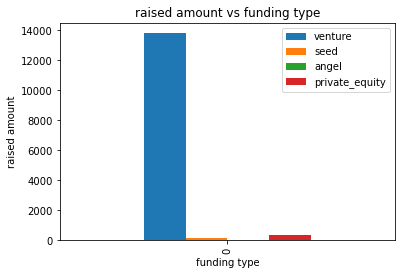

In [37]:
#bar plot for raised amount vs funding type
fundingtypesSpark.plot.bar()
plt.title("raised amount vs funding type")
plt.xlabel("funding type")
plt.ylabel("raised amount")
plt.show()

In [38]:
fundingTypeRepresentiveValue = pd.DataFrame({'venture':[round((float(venture_frame['raised_amount_usd'].mean())/1000000),2)], 'seed':[round((float(seed_frame['raised_amount_usd'].mean())/1000000),2)], 'angel':[round((float(angel_frame['raised_amount_usd'].mean())/1000000),2)], 'private_equity':[round((float(private_equity_frame['raised_amount_usd'].mean())/1000000),2)]})
fundingTypeRepresentiveValue

,venture,seed,angel,private_equity
0,11.75,0.72,0.96,73.31


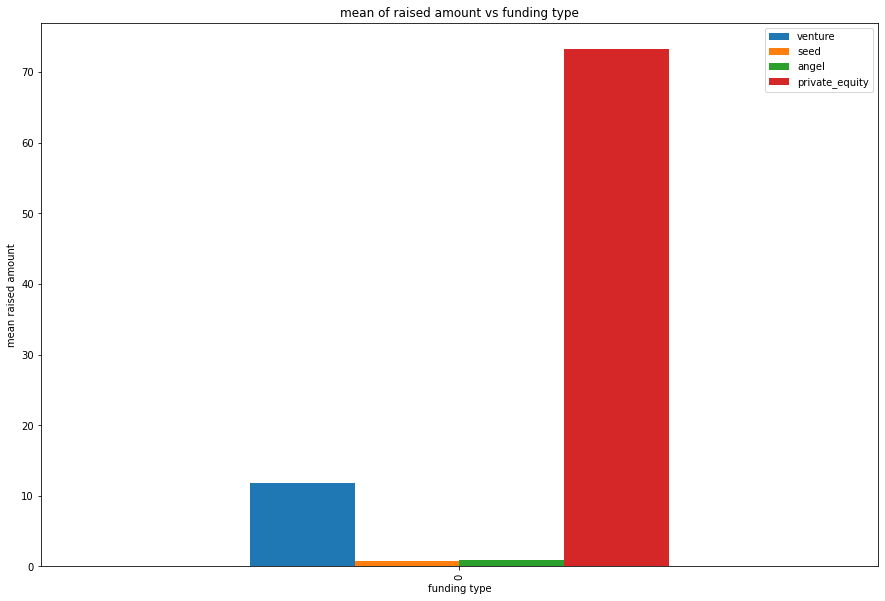

In [39]:
#plot for mean of raised amount
plt.rcParams["figure.figsize"] = (15,10)
fundingTypeRepresentiveValue.plot.bar()
plt.title("mean of raised amount vs funding type")
plt.xlabel("funding type")
plt.ylabel("mean raised amount")
plt.show()

In [40]:
#uniform country code, making all country codes uppercase
venture_frame['country_code'] = venture_frame['country_code'].str.upper()

In [41]:
#country wise raised amount by venture funding type
venture_frame.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False).head(9)

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [42]:
#top9 countries based on total amount raised in venture funding type
top9VentureCountries = venture_frame.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False).head(9)

In [43]:
top9VentureCountries

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


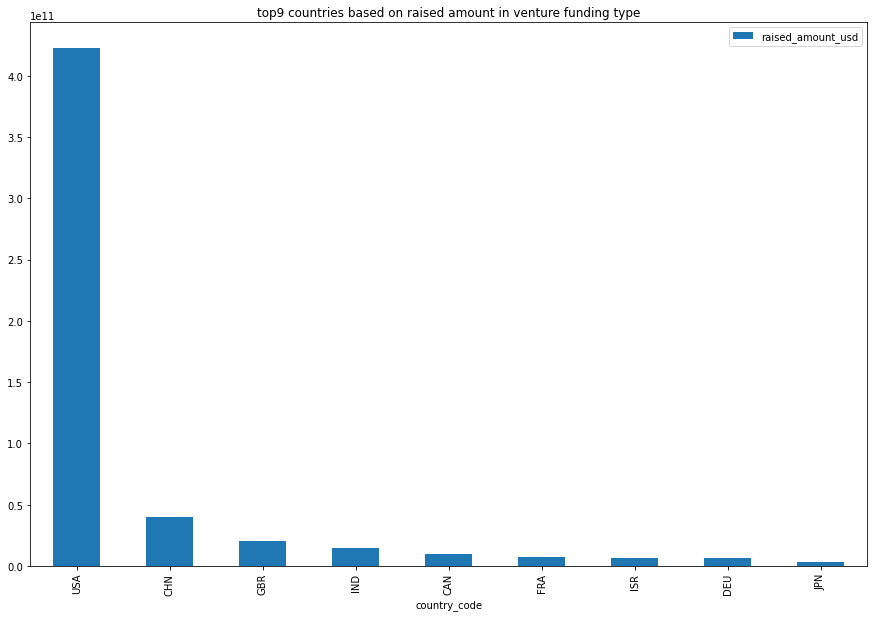

In [44]:
#plot showing top9 countries based on amount raised in venture funding type
top9VentureCountries.plot.bar()
plt.rcParams["figure.figsize"] = (15,10)
plt.title("top9 countries based on raised amount in venture funding type")
plt.show()

In [45]:
#top9 countries based on the total investment amount each country has received
top9 = venture_frame[venture_frame['country_code'].apply(lambda x: x in top9VentureCountries.index)]

In [46]:
#Cleaning top9
#calculating % of na values in category_list
(top9['category_list'].isna().sum()/top9.shape[0])*100

0.5970754568190523

In [47]:
#removing na values from category list since the percentage is very small
top9 = top9.dropna(subset=['category_list'])
#converting category_list values to str
top9['category_list'] = top9['category_list'].astype(str)

In [48]:
top9['category_list'] = top9['category_list'].apply(lambda x: x.split('|')[0])

In [49]:
#top3 english speaking countries
top3English = top9[(top9['country_code'] == 'USA')|(top9['country_code'] == 'GBR')|(top9['country_code'] == 'IND')]

In [50]:
#top3 english speaking country
top3English = top3English.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False)

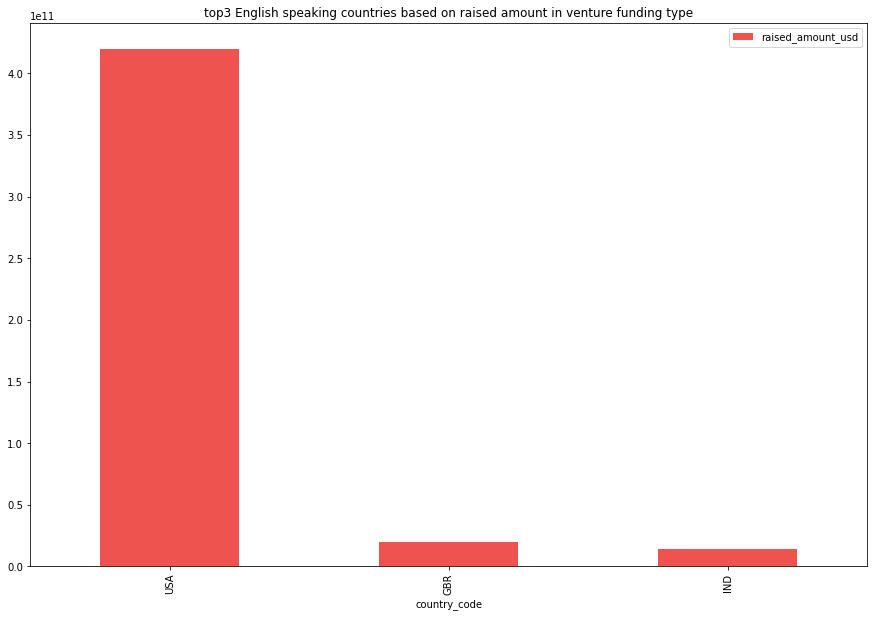

In [51]:
#plot for total amout raised in top3 countries from venture funding type
top3English.plot.bar(color = '#ef5350')
plt.rcParams["figure.figsize"] = (15,10)
plt.title("top3 English speaking countries based on raised amount in venture funding type")
plt.show()

In [52]:
#converting category_list type to str
mapping['category_list'] = mapping['category_list'].astype(str)

In [53]:
#correcrting category_list values, replaceing 0 with na
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na') if x!='Enterprise 2.0' else 'Enterprise 2.0')

In [54]:
mapping.columns[1:].tolist()

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [55]:
#adding main_sector to mapping dataframe
mapping['main_sector'] = mapping[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']].idxmax(axis=1)

In [56]:
#Taking ncessary columns from mapping df into mappingNew
mappingNew = mapping[['category_list', 'main_sector']]

In [57]:
mappingNew = mappingNew.iloc[1:, :]

In [58]:
#after converting all the values to lowercase
mappingNew

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
...,...,...
683,Wholesale,Others
684,Wine And Spirits,Entertainment
685,Wireless,Entertainment
686,Women,Others


In [59]:
#adding main_sector to mapping dataframe
mapping['main_sector'] = mapping[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']].idxmax(axis=1)

#Taking ncessary columns from mapping df into mappingNew
mappingNew = mapping[['category_list', 'main_sector']]

top9withSector = pd.merge(top9, mappingNew, left_on='category_list', right_on='category_list')

In [62]:
#top3 english speaking countries
top3Englishsector = top9withSector[(top9withSector['country_code'] == 'USA')|(top9withSector['country_code'] == 'GBR')|(top9withSector['country_code'] == 'IND')]

In [64]:
som = top9withSector[['main_sector', 'raised_amount_usd']].groupby('main_sector').sum()
som.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,1.347610e+11
Others,1.094884e+11
"Social, Finance, Analytics, Advertising",1.081834e+11
"News, Search and Messaging",6.030491e+10
Health,3.945301e+10
Manufacturing,3.237942e+10
Entertainment,2.541749e+10
Automotive & Sports,1.516445e+10


In [65]:
#top9 countries sector wise total amount raised
sectorwisesum = top3Englishsector[['main_sector', 'raised_amount_usd']].groupby('main_sector').sum()

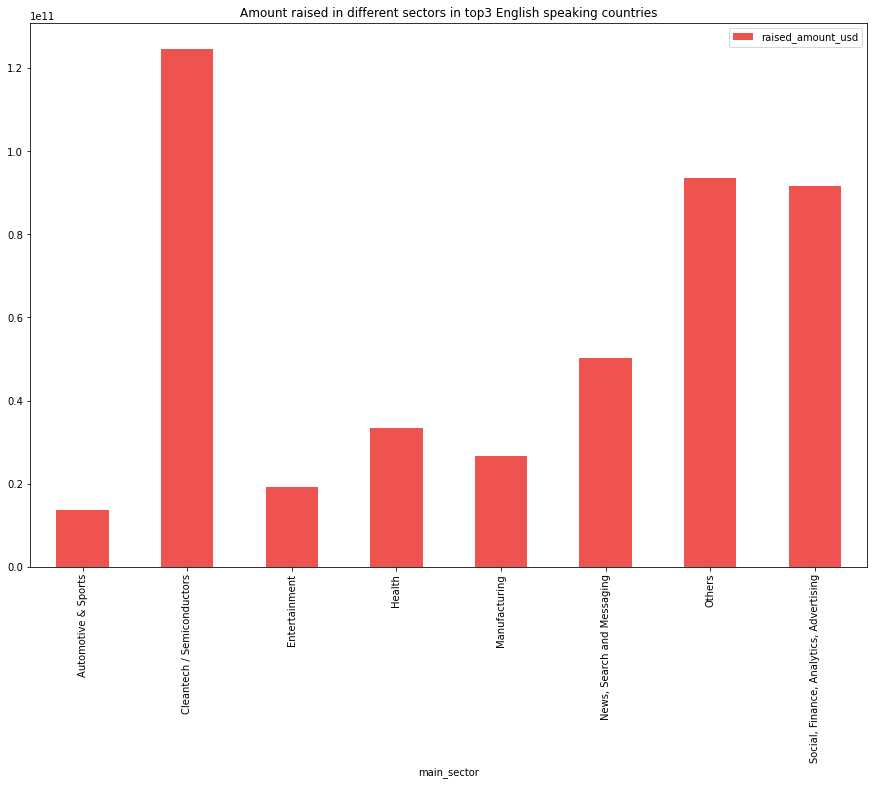

In [66]:
#plot for amount raised in different sector by venture funding type in top3 english speaking cvountries
sectorwisesum.plot.bar(color = '#ef5350')
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Amount raised in different sectors in top3 English speaking countries")
plt.show()

In [69]:
#Dataframe with country code as USA and raised amount in between 5 to 15 million USD
D1 = top9withSector[(top9withSector['country_code'] == 'USA') & (top9withSector['raised_amount_usd'] > 5000000) & (top9withSector['raised_amount_usd'] < 15000000)]

In [70]:
#Dataframe with country code as GBR and raised amount in between 5 to 15 million USD
D2 = top9withSector[(top9withSector['country_code'] == 'GBR') & (top9withSector['raised_amount_usd'] > 5000000) & (top9withSector['raised_amount_usd'] < 15000000)]

In [71]:
#Dataframe with country code as IND and raised amount in between 5 to 15 million USD
D3 = top9withSector[(top9withSector['country_code'] == 'IND') & (top9withSector['raised_amount_usd'] > 5000000) & (top9withSector['raised_amount_usd'] < 15000000)]

In [72]:
D1.shape

(9942, 17)

In [73]:
D2.shape

(559, 17)

In [74]:
D3.shape

(243, 17)

In [75]:
#total amount raised
D1['raised_amount_usd'].sum()

88638294664.0

In [76]:
#total amount raised
D2['raised_amount_usd'].sum()

4875228300.0

In [77]:
#total amount raised
D3['raised_amount_usd'].sum()

2174543602.0

In [78]:
#count no. of investements made on particular sector in USA
D1.groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
main_sector,,,,,,,,,,,,,,,,
Others,2423,2423,2423,1757,2423,2423,2423,2423,2251,2423,2423,2423,2422,2422,2422,2107
"Social, Finance, Analytics, Advertising",2216,2216,2216,1762,2216,2216,2216,2216,2168,2216,2216,2216,2216,2213,2213,2039
Cleantech / Semiconductors,1951,1951,1951,1154,1951,1951,1951,1951,1848,1951,1951,1951,1951,1949,1949,1536
"News, Search and Messaging",1280,1280,1280,1009,1280,1280,1280,1280,1240,1280,1280,1280,1279,1278,1278,1153
Health,760,760,760,428,760,760,760,760,714,760,760,760,760,760,760,583
Manufacturing,691,691,691,454,691,691,691,691,653,691,691,691,691,690,690,575
Entertainment,479,479,479,380,479,479,479,479,466,479,479,479,479,479,479,432
Automotive & Sports,142,142,142,90,142,142,142,142,133,142,142,142,142,142,142,121


In [79]:
#count no. of investements made on particular sector in GBR
D2.groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
main_sector,,,,,,,,,,,,,,,,
Others,129,129,129,72,129,129,129,129,119,129,129,129,128,128,128,108
Cleantech / Semiconductors,124,124,124,80,124,124,124,124,119,124,124,124,117,114,114,81
"Social, Finance, Analytics, Advertising",118,118,118,89,118,118,118,118,115,118,118,118,117,115,115,105
"News, Search and Messaging",65,65,65,38,65,65,65,65,63,65,65,65,65,63,63,57
Entertainment,48,48,48,33,48,48,48,48,46,48,48,48,48,47,47,42
Manufacturing,38,38,38,16,38,38,38,38,34,38,38,38,36,34,34,25
Health,23,23,23,10,23,23,23,23,23,23,23,23,22,19,19,13
Automotive & Sports,14,14,14,11,14,14,14,14,14,14,14,14,13,12,12,12


In [80]:
#count no. of investements made on particular sector in IND
D3.groupby('main_sector').count().sort_values(by='raised_amount_usd', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
main_sector,,,,,,,,,,,,,,,,
Others,78,78,78,56,78,78,78,78,78,78,78,78,78,78,78,71
"Social, Finance, Analytics, Advertising",45,45,45,31,45,45,45,45,45,45,45,45,45,45,45,39
"News, Search and Messaging",41,41,41,33,41,41,41,41,39,41,41,41,41,41,41,37
Entertainment,23,23,23,16,23,23,23,23,23,23,23,23,23,23,23,16
Manufacturing,18,18,18,7,18,18,18,18,18,18,18,18,18,18,18,15
Health,17,17,17,10,17,17,17,17,17,17,17,17,17,17,17,11
Cleantech / Semiconductors,14,14,14,8,14,14,14,14,14,14,14,14,14,14,14,12
Automotive & Sports,7,7,7,6,7,7,7,7,7,7,7,7,7,7,7,7


In [81]:
#most valued company in USA in venture fundint type of others category
D1[(D1['main_sector'] == 'others')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [82]:
#most valued company in USA in venture fundint type of others category
D2[(D2['main_sector'] == 'others')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [83]:
#most valued company in USA in venture fundint type of others category
D3[(D3['main_sector'] == 'others')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [84]:
#most valued company in USA in venture fundint type of social, finance, analytics, advertising category
D1[(D1['main_sector'] == 'social, finance, analytics, advertising')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [85]:
#most valued company in GBR in venture fundint type of cleantech / semiconductors category
D2[(D2['main_sector'] == 'cleantech / semiconductors')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [86]:
#most valued company in IND in venture fundint type of social, finance, analytics, advertising category
D3[(D3['main_sector'] == 'social, finance, analytics, advertising')].sort_values(by='raised_amount_usd', ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector


In [87]:
#sectorwise sum for USA
sectorwisesumD1 = D1[['main_sector', 'raised_amount_usd']].groupby('main_sector').sum()

In [88]:
sectorwisesumD1

,raised_amount_usd
main_sector,
Automotive & Sports,1.269104e+09
Cleantech / Semiconductors,1.780163e+10
Entertainment,4.119198e+09
Health,6.866859e+09
Manufacturing,6.228553e+09
"News, Search and Messaging",1.121957e+10
Others,2.173601e+10
"Social, Finance, Analytics, Advertising",1.939738e+10


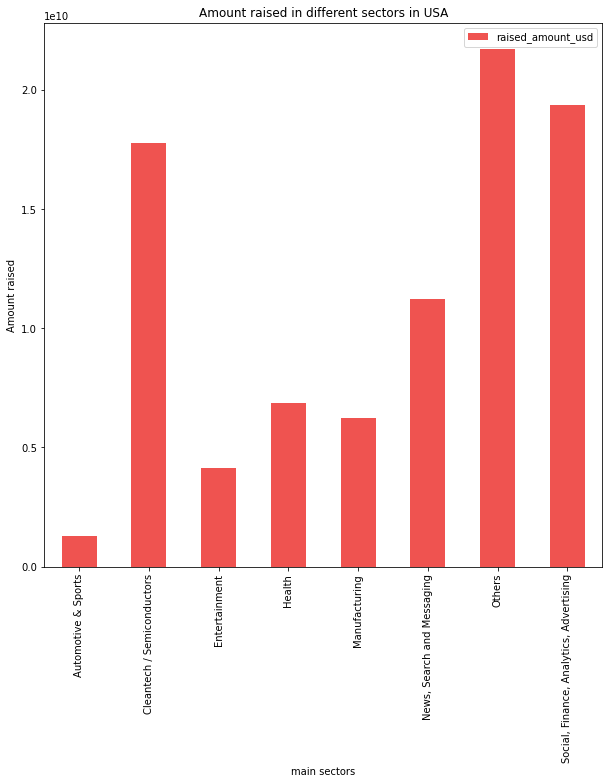

In [89]:
#plot for sectorwise sum for USA
sectorwisesumD1.plot.bar(color = '#ef5350')
plt.rcParams["figure.figsize"] = (10,15)
plt.title("Amount raised in different sectors in USA")
plt.xlabel("main sectors")
plt.ylabel("Amount raised")
plt.show()

In [90]:
#count of total no. of investement types for D1
sectorwisecountD1 = D1[['main_sector', 'raised_amount_usd']].groupby('main_sector').count()
sectorwisecountD1

,raised_amount_usd
main_sector,
Automotive & Sports,142
Cleantech / Semiconductors,1951
Entertainment,479
Health,760
Manufacturing,691
"News, Search and Messaging",1280
Others,2423
"Social, Finance, Analytics, Advertising",2216


In [91]:
#sum of amount raised sector wise for D2
sectorwisesumD2 = D2[['main_sector', 'raised_amount_usd']].groupby('main_sector').sum()

In [92]:
#count of total no. of investement types for D2
sectorwisecountD2 = D2[['main_sector', 'raised_amount_usd']].groupby('main_sector').count()
sectorwisecountD2

,raised_amount_usd
main_sector,
Automotive & Sports,14
Cleantech / Semiconductors,124
Entertainment,48
Health,23
Manufacturing,38
"News, Search and Messaging",65
Others,129
"Social, Finance, Analytics, Advertising",118


In [93]:

sectorwisesumD2.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Others,1.123624e+09
Cleantech / Semiconductors,1.110140e+09
"Social, Finance, Analytics, Advertising",9.744040e+08
"News, Search and Messaging",5.657462e+08
Entertainment,4.227847e+08
Manufacturing,3.319403e+08
Health,2.095375e+08
Automotive & Sports,1.370516e+08


In [94]:
sectorwiseD2 = sectorwisesumD2.merge(sectorwisecountD2, left_on='main_sector', right_on='main_sector')

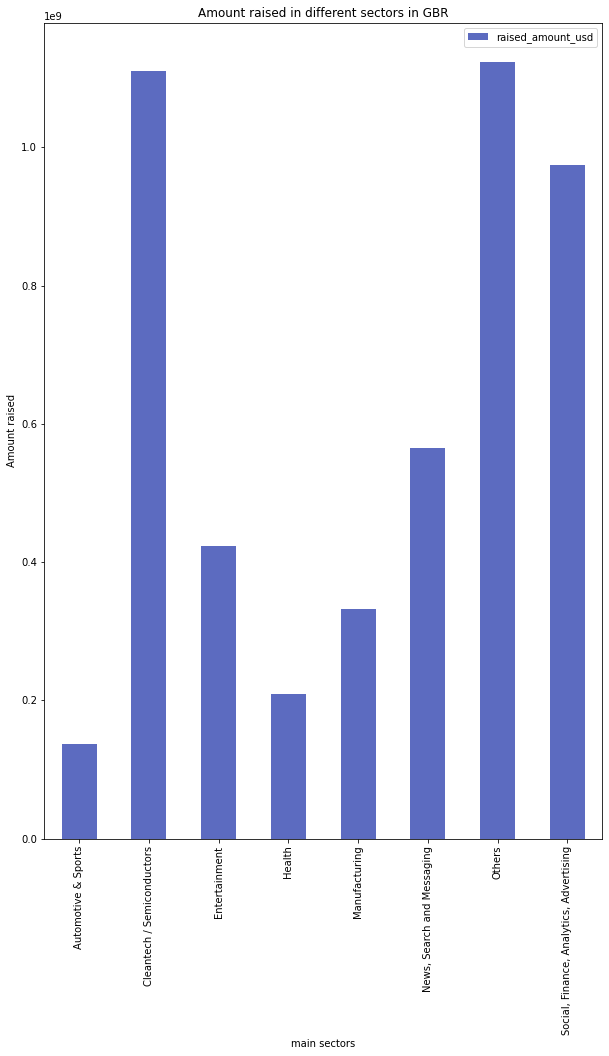

In [95]:
#setcorwise amount raised plot for GBR country
sectorwisesumD2.plot.bar(color = '#5c6bc0')
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("main sectors")
plt.ylabel("Amount raised")
plt.title("Amount raised in different sectors in GBR")
plt.show()

In [96]:
sectorwisecountD3 = D3[['main_sector', 'raised_amount_usd']].groupby('main_sector').count()
sectorwisecountD3.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Others,78
"Social, Finance, Analytics, Advertising",45
"News, Search and Messaging",41
Entertainment,23
Manufacturing,18
Health,17
Cleantech / Semiconductors,14
Automotive & Sports,7


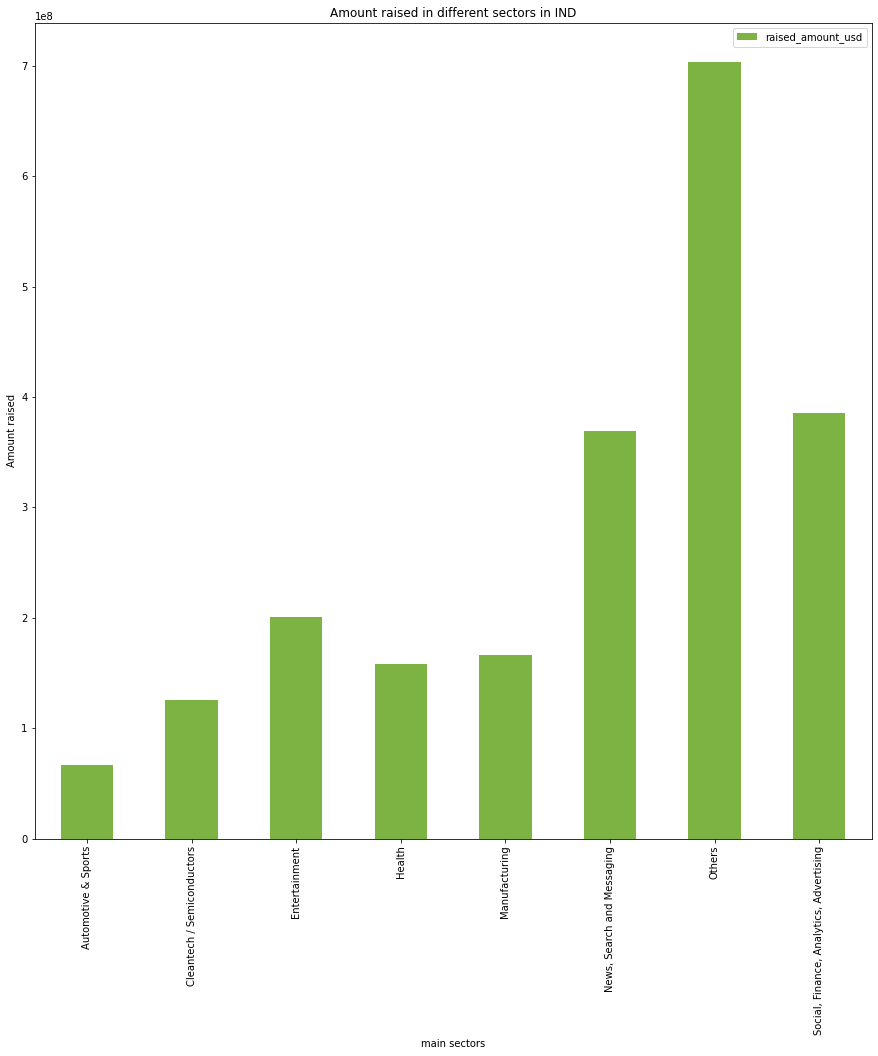

In [97]:
#Amount raised vs sectors plot for IND country
sectorwisesumD3 = D3[['main_sector', 'raised_amount_usd']].groupby('main_sector').sum()
sectorwisesumD3.plot.bar(color = '#7cb342')
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("main sectors")
plt.ylabel("Amount raised")
plt.title("Amount raised in different sectors in IND")
plt.show()

In [98]:
sectorwisesumD3.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
main_sector,
Others,703409507.0
"Social, Finance, Analytics, Advertising",385549550.0
"News, Search and Messaging",368834545.0
Entertainment,200830000.0
Manufacturing,165900000.0
Health,157740000.0
Cleantech / Semiconductors,125380000.0
Automotive & Sports,66900000.0


## Conclusion

Based on the constraints from Spark Funds,
* Funding type suitable for Sparks Funds is Venture Funding type
* Top English Speaking country for Spark Funds to invest in is USA
* Top sector sector to invest in is others

Other countries to consider are: **GBR, IND**

Other sectors to consider investing in are:
* cleantech / semiconductors
* social, finance, analytics, advertising